## Парсинг данных с сайта на Python

### Определения

Парсинг - это процесс сбора данных с последующей их обработкой и анализом.

Программа, которая занимается парсингом, называют - парсер.


### Условие задачи

С сайта ( https://habr.com/ru/search/ ) необходимо построить исходный набор данных (.csv или .xml). Набор данных должен включать __названия, описание, рейтинг и сферу деятельности компаний, дату публикации, а также текст статей из Интернет-ресурсов__. Подготовленный набор данных должен содержать сведения о всех номинантах конкурса. Разработанный парсер должен извлекать гиперссылки из начальной страницы с последующим обходом всех страниц по полученным ссылкам и извлечением их содержимого. Можно дополнить набор какими-либо другими данными, если они могут быть полезны для дальнейшего исследования.


### Этапы парсинга

1. Поиск данных
2. Получение информации
3. Сохранение данных

### Подключение библиотек

In [13]:
pip install WordCloud

In [14]:
from bs4 import BeautifulSoup as bs

Beautiful Soup - это библиотека Python для извлечения данных из HTML и XML файлов. 

In [16]:
import requests

Библиотека requests является стандартным инструментом для составления HTTP-запросов в Python.

In [18]:
import pandas as pd

In [19]:
# %%
!pip install beautifulsoup4 requests numpy pandas matplotlib seaborn scikit-learn nltk gensim pyLDAvis wordcloud
!python -m nltk.downloader punkt stopwords wordnet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\V\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


### Получение информаций

In [21]:
# GET - запрос
url = 'https://habr.com/ru/all/' # страница со всеми статьями 
page = requests.get(url)

Метод __requests.get(url)__ из библиотеки requests в Python выполняет HTTP-запрос типа GET по указанному URL. Этот запрос используется для получения данных с веб-страницы или API, в нашем случае из страницы habr.

In [23]:
page.status_code

200

Если вызвать __page.status_code__, то получим статус состояния HTTP. например, 200 — успешно, 404 — страница не найдена, 500 — ошибка сервера 


In [25]:
soup = bs(page.text, 'html.parser')

__bs__ — это сокращение от BeautifulSoup, основного класса библиотеки Beautiful Soup.

__bs(page.text, 'html.parser')__ создаёт объект BeautifulSoup, который парсит HTML-код из page.text с использованием указанного парсера.

__'html.parser'__ — это встроенный парсер Python, который не требует установки дополнительных библиотек.а.

In [27]:
page.text

'<!DOCTYPE html>\n<html lang="ru">\n\n  <head>\n    <title>Все статьи подряд &#x2F; Хабр</title>\n<link rel="image_src" href="/img/habr_ru.png" data-hid="2a79c45">\n<link href="https://habr.com/ru/articles/" rel="canonical" data-hid="e3fa780">\n<link href="https://habr.com/ru/articles/" hreflang="ru" rel="alternate" data-hid="7d51b8a">\n<link href="https://habr.com/en/articles/" hreflang="en" rel="alternate" data-hid="7d51b8a">\n<meta itemprop="image" content="/img/habr_ru.png">\n<meta property="og:image" content="/img/habr_ru.png">\n<meta property="og:image:width" content="1200">\n<meta property="og:image:height" content="630">\n<meta property="aiturec:image" content="/img/habr_ru.png">\n<meta name="twitter:image" content="/img/habr_ru.png">\n<meta property="vk:image" content="/img/habr_ru.png?format=vk">\n<meta property="fb:app_id" content="444736788986613">\n<meta property="fb:pages" content="472597926099084">\n<meta name="twitter:card" content="summary_large_image">\n<meta name="tw

In [28]:
soup

<!DOCTYPE html>

<html lang="ru">
<head>
<title>Все статьи подряд / Хабр</title>
<link data-hid="2a79c45" href="/img/habr_ru.png" rel="image_src"/>
<link data-hid="e3fa780" href="https://habr.com/ru/articles/" rel="canonical"/>
<link data-hid="7d51b8a" href="https://habr.com/ru/articles/" hreflang="ru" rel="alternate"/>
<link data-hid="7d51b8a" href="https://habr.com/en/articles/" hreflang="en" rel="alternate"/>
<meta content="/img/habr_ru.png" itemprop="image"/>
<meta content="/img/habr_ru.png" property="og:image"/>
<meta content="1200" property="og:image:width"/>
<meta content="630" property="og:image:height"/>
<meta content="/img/habr_ru.png" property="aiturec:image"/>
<meta content="/img/habr_ru.png" name="twitter:image"/>
<meta content="/img/habr_ru.png?format=vk" property="vk:image"/>
<meta content="444736788986613" property="fb:app_id"/>
<meta content="472597926099084" property="fb:pages"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@habr_com" name=

In [29]:
result_list = {'title': [], 'namecompany': [], 'description': [], 'rating': [], 'field': [], 'date': [], 'textpub': []}

### Алгоритм

In [31]:
pagenum = 1
for i in range(10):
    url = 'https://habr.com/ru/articles/page' + str(pagenum) + '/' # переход на ссылуку с определённым номером сраницы
    page = requests.get(url)
    soup = bs(page.text, 'html.parser')
    titles = soup.find_all('h2', class_='tm-title tm-title_h2')# получаем заголовки всех статей на этой странице
    
    for i in titles: 
        # переход на страницу статьи
        url = 'https://habr.com' + str(i.a.get('href')) 
        page = requests.get(url)
        soup = bs(page.text, 'html.parser')
        
        name_company = soup.find('a', class_='tm-company-snippet__title')# получаем название компаний
        desc_company = soup.find('div', class_='tm-company-snippet__description')# получаем описание компаний
        
        if (name_company is not None): #если на странице присутсвует компания
        
            result_list['title'].append(i.text) # записываем название статьи
            result_list['namecompany'].append(name_company.text) # записываем название компании
            result_list['description'].append(desc_company.text) # записываем описание компании
            
            datepub = soup.find('span', class_='tm-article-datetime-published') # находим дату публикаций
            result_list['date'].append(datepub.time['datetime'][0: 10]) # записываем дату публикаций
            
            # текст статьи
            try:
                textpub = soup.find('div', class_='article-formatted-body article-formatted-body article-formatted-body_version-2').get_text()
                textpub = textpub.replace('\n', ' ').replace('\t', ' ').replace('\xa0', ' ').replace('\u200e', ' ').replace('\r', ' ')
            except:
                textpub = soup.find('div', class_='article-formatted-body article-formatted-body article-formatted-body_version-1').get_text()
                textpub = textpub.replace('\n', ' ').replace('\t', ' ').replace('\xa0', ' ').replace('\u200e', ' ').replace('\r', ' ')
            result_list['textpub'].append(textpub)
            
            # переход на страницу компании
            url = 'https://habr.com' + str(name_company.get('href'))
            page = requests.get(url)
            soup = bs(page.text, 'html.parser')
            
            #записываем рейтинг
            rating = soup.find('span', class_='tm-votes-lever__score-counter tm-votes-lever__score-counter tm-votes-lever__score-counter_rating')
            if(rating is None):
                result_list['rating'].append('0')
            else:
                result_list['rating'].append((rating.text).strip())
               
             #записываем отрасли компаний
            fieldtext = ""
            fields = soup.find_all('a', 'tm-company-profile__categories-text')
            for field in fields:
                fieldtext = fieldtext + ((field.text).strip()) + ", "
            if (fields is None):
                result_list['field'].append(None)
            else:
                result_list['field'].append(fieldtext[0:-2])
            
    pagenum += 1

In [32]:
result_list

{'title': ['Нам обещают хиты. Главные игры с летних презентаций 2025',
  'Генератор синтетических документов для обучения моделей ИИ',
  'Проективные вопросы на собеседованиях: не дайте себя подловить',
  'Бесстыжий тимлид: как уязвимости делают сильнее',
  'Простой самодельный терменвокс',
  'Путь к современному MDM на примере клиентского домена данных',
  'Из Москвы к Персидскому заливу на мотоцикле. Часть 2: Грузия и Армения',
  'Как использовать проект libfru\u202f/\u202ffrugen для инвентаризации серверов',
  'Что внутри винтажного смартфона HTC ChaCha',
  'Как написать микробенчмарк',
  'Планирование в Python',
  'Книга: «The Last of Us. Как серия исследует человеческую природу и дарит неповторимый игровой опыт» Николя Денешо',
  'Как настроить ежедневный алертинг по\xa0маркетинговым метрикам с\xa0помощью SQL',
  'Техники антипродуктивности',
  '7 типичных ошибок CISO',
  'Не одним MacBook единым: ноутбук для айтишника',
  'Июньский «В тренде VM»: уязвимости в Windows, Apache HTTP

In [33]:
print("Количество нулевых значений в: ")
for i in result_list:
    print( i + " - " + str(result_list[i].count(None)))

Количество нулевых значений в: 
title - 0
namecompany - 0
description - 0
rating - 0
field - 0
date - 0
textpub - 0


### Сохранение данных

In [35]:
file_name = 'habr.csv'
df = pd.DataFrame(data=result_list)
df.to_csv(file_name)

In [36]:
df.head()

,title,namecompany,description,rating,field,date,textpub
0,Нам обещают хиты. Главные игры с летних презен...,Timeweb Cloud,То самое облако,0,Связь и телекоммуникации,2025-06-20,"Июнь почти кончился, а это значит, что отгреме..."
1,Генератор синтетических документов для обучени...,Институт системного программирования им. В.П. ...,"Образование, исследования, инновации",0,"Программное обеспечение, Некоммерческие органи...",2025-06-20,Где взять пару миллионов документов с разметко...
2,Проективные вопросы на собеседованиях: не дайт...,Цифровой СИБУР,Цифровизируем промышленность,0,"Программное обеспечение, Дизайн и юзабилити, М...",2025-06-20,Источник: gigabaza.ruВас спрашивали на интервь...
3,Бесстыжий тимлид: как уязвимости делают сильнее,AvitoTech,У нас живут ваши объявления,0,"Веб-разработка, Электронная коммерция, Веб-сер...",2025-06-20,"Привет, Хабр! Я Лера, технический писатель в А..."
4,Простой самодельный терменвокс,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,0,"Связь и телекоммуникации, Домены и хостинг, Ве...",2025-06-20,"Картинка Bettmann, Corbis, What's On the Air ..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        92 non-null     object
 1   namecompany  92 non-null     object
 2   description  92 non-null     object
 3   rating       92 non-null     object
 4   field        92 non-null     object
 5   date         92 non-null     object
 6   textpub      92 non-null     object
dtypes: object(7)
memory usage: 5.2+ KB


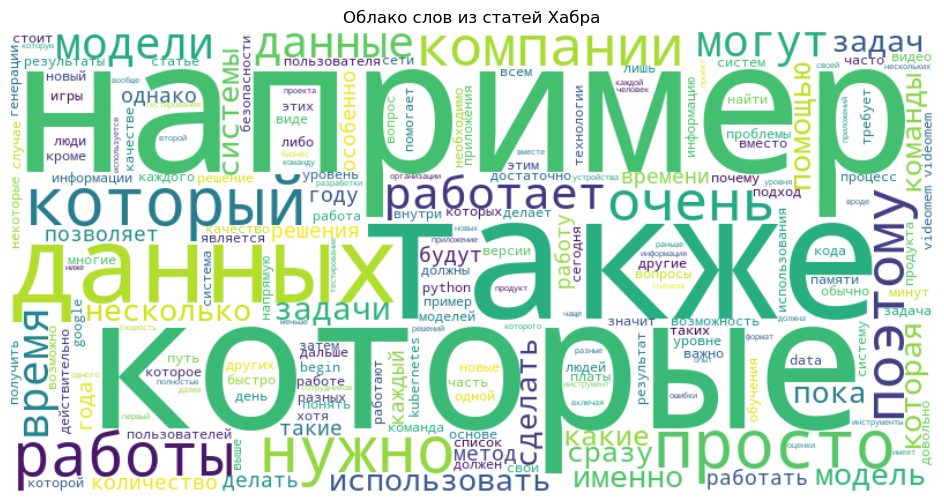

In [38]:
stop_words = stopwords.words('russian')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^а-яА-ЯёЁa-zA-Z]', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 3]
    return ' '.join(tokens)

# Предобработка текстаа
df['processed_text'] = df['textpub'].apply(preprocess_text)
df['processed_title'] = df['title'].apply(preprocess_text)

# Визуализация облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_text']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из статей Хабра')
plt.show()

# LDA

In [40]:
texts = [text.split() for text in df['processed_text']]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

# Построение модели
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=42,
    passes=10,
    alpha='auto'
)

In [41]:
# Визуализация
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

# Вывод ключевых слов
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.003*"также" + 0.003*"нужно" + 0.003*"который" + 0.002*"сети" + 0.002*"которые" + 0.002*"engine" + 0.002*"задач" + 0.002*"fastapi" + 0.002*"например" + 0.002*"wavemanager"

Topic: 1 
Words: 0.003*"данных" + 0.003*"модели" + 0.002*"модель" + 0.002*"например" + 0.002*"которые" + 0.002*"просто" + 0.002*"который" + 0.002*"electric" + 0.002*"данные" + 0.002*"собрания"

Topic: 2 
Words: 0.005*"begin" + 0.005*"then" + 0.003*"rect" + 0.003*"else" + 0.003*"videomem" + 0.003*"websocket" + 0.003*"robot" + 0.003*"addr" + 0.003*"nescpu" + 0.002*"byte"

Topic: 3 
Words: 0.003*"которые" + 0.003*"vault" + 0.003*"например" + 0.002*"просто" + 0.002*"secret" + 0.002*"компании" + 0.002*"нужно" + 0.002*"также" + 0.002*"который" + 0.002*"могут"

Topic: 4 
Words: 0.003*"trex" + 0.003*"данных" + 0.003*"которые" + 0.003*"задачи" + 0.002*"например" + 0.002*"работы" + 0.002*"нужно" + 0.002*"модель" + 0.002*"модели" + 0.002*"задач"



# TF-IDF

In [43]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))


NameError: name 'russian_stopwords' is not defined

In [ ]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenize_text'])

In [ ]:
tfidf_matrix.shape

In [ ]:
print(tfidf_matrix)

In [ ]:
top_hubs = df['field'].str.split(', ').explode().value_counts().head(5).index.tolist()
print("Выбранные хабы для классификации:", top_hubs)

def get_main_hub(hubs_str):
    if pd.isna(hubs_str):
        return 'other'
    hubs = hubs_str.split(', ')
    for hub in hubs:
        if hub in top_hubs:
            return hub
    return 'other'

df['main_hub'] = df['field'].apply(get_main_hub)

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['processed_text'])
y = df['main_hub']

print(f"\nРазмерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

print("\nРаспределение классов:")
print(y.value_counts())

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print("\nРазмерность X_train:", X_train.shape)
        print("Размерность y_train:", y_train.shape)
        from sklearn.svm import LinearSVC
        
        svm = LinearSVC(random_state=42, max_iter=10000)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        
        print("\nОтчет о классификации:")
        print(classification_report(y_test, y_pred))
        
        plt.figure(figsize=(10, 7))
        sns.heatmap(confusion_matrix(y_test, y_pred), 
                    annot=True, fmt='d', cmap='Blues',
                    xticklabels=svm.classes_, yticklabels=svm.classes_)
        plt.title('Матрица ошибок классификации статей по хабам')
        plt.xlabel('Предсказанные')
        plt.ylabel('Фактические')
        plt.show()

In [ ]:
nmf_model = NMF(n_components=10, random_state=0)
nmf_model.fit(tfidf_matrix)

for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

In [ ]:
nmf_model = NMF(n_components=5, random_state=0)
nmf_model.fit(tfidf_matrix)

for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_tfidf)
df['cluster'] = clusters

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Визуализация кластеров статей (PCA)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.show()

In [ ]:
print("\nПримеры статей по кластерам:")
for cluster_num in range(optimal_k):
    print(f"\nКластер {cluster_num}:")
    titles = df[df['cluster'] == cluster_num]['title'].head(3).tolist()
    for i, title in enumerate(titles, 1):
        print(f"{i}. {title}")

In [ ]:
if 'main_hub' in df.columns:
    print("\nСвязь кластеров с тематиками:")
    cross_tab = pd.crosstab(df['cluster'], df['main_hub'], normalize='index')
    plt.figure(figsize=(12, 6))
    sns.heatmap(cross_tab, annot=True, cmap='Blues')
    plt.title('Распределение тематик по кластерам')
    plt.xlabel('Тематика')
    plt.ylabel('Кластер')
    plt.show()

In [ ]:
df.to_csv('habr_articles.csv', index=False)

In [ ]:
df.head()

# Обучение классификатора

In [50]:
#  (Метод ближайших соседей)